In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
import matplotlib.cm as cm

plt.rcParams['figure.figsize']=(20, 10)
plt.rcParams['axes.titlesize']=20

# Statystyka - Zestaw 4
### Autor: Konrad Ulman

## Gra z dwoma kostkami
* Rzucamy dwie kostki sześcienne - czarną i zieloną
* Gracz wygra 1zł jeśli na zielonej wypadnie liczba większa niż na czarnej
* Gracz przegrywa 1zł w przeciwnym wypadku

In [2]:
class Player:
    def __init__(self, bank: int):
        self.bank = bank
        
    def lost_game(self, bet: int) -> None:
        self.bank -= bet
    
    def won_game(self, bet: int) -> None:
        self.bank += bet
    
    def __repr__(self):
        return str(self.__dict__)

In [3]:
class Game:
    def __init__(self, game_history: tuple, amount_history: tuple = None):
        self.game_history = game_history
        self.amount_history = amount_history

In [4]:
def roll_dice() -> int:
    return int(np.random.uniform(1, 7))


def extract_game_data(data: list) -> list:
    prob_win_data = []
    wins = 0
    games = 0
    for game in data:
        games += 1
        if game: wins += 1
        prob_win_data.append((wins/games))
    return prob_win_data


def dice_game(number_of_games: int, player: Player = None, bet_amount: int = 0, bet_lost_amount: int = 0) -> list:
    game_history = []
    amount_history = [] if player is not None else None
    counter = 0
    while counter < number_of_games:
        if player is not None:
            if player.bank <= 0:
                break
        black_dice = roll_dice()
        green_dice = roll_dice()
        player_win_condition = black_dice < green_dice
        game_history.append(player_win_condition)
        
        if amount_history is not None:
            player.won_game(bet_amount) if player_win_condition else player.lost_game(bet_lost_amount)
            amount_history.append(player.bank)

        counter += 1
    return game_history, amount_history

### Problem A

* Symulacja $ N = 10^6 $ rzutów dwoma kostkami 
* Porównać eksperymentalną wartość prawdopodobieństwa wygrania w jednej grze z teoretyczną

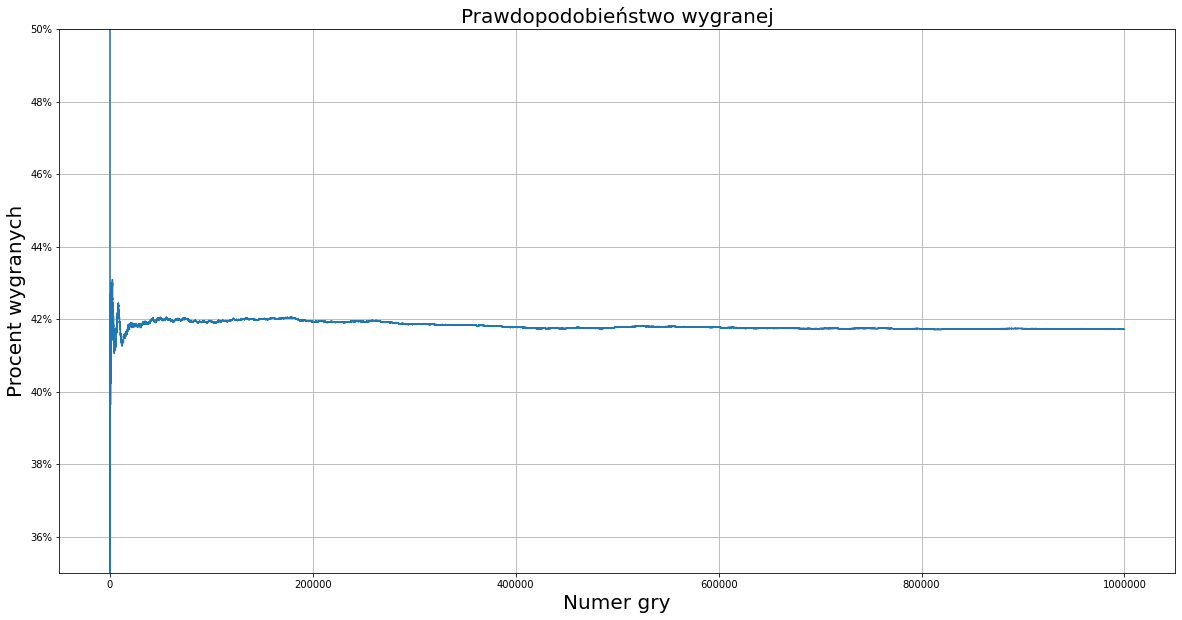

Eksperymentalna wartość wygranej wynosi 0.41811
Teoretyczna wartość wygranej wynosi 0.41667


In [5]:
N = 10**6

game_history, _ = dice_game(N)
results = extract_game_data(game_history)
plt.plot(np.arange(N), [game * 100 for game in results])
plt.title('Prawdopodobieństwo wygranej')
plt.xlabel('Numer gry', fontsize=20)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter("%d%%"))
plt.ylabel('Procent wygranych', fontsize=20)
plt.grid()
plt.ylim(35, 50)
plt.show()

print(f'Eksperymentalna wartość wygranej wynosi {sum(results)/N:.5f}')
print(f'Teoretyczna wartość wygranej wynosi {15/36:.5f}')

### Problem B
* Gracz ma kapitał początkowy $ c = 500 $ [zł]
* Symulacja gier z wygraną 1 [zł]
* Symulacja trwa $ 10^5 $ gier, albo dopóki gracz nie zbankrutuje
* Wykres zależności kapitału od ilości gier - eksperymentalny (z symulacji) oraz teoretyczny (ze wzoru (2))
* Porównać średnią wartość wygrania w jednej grze z wartością oczekiwaną

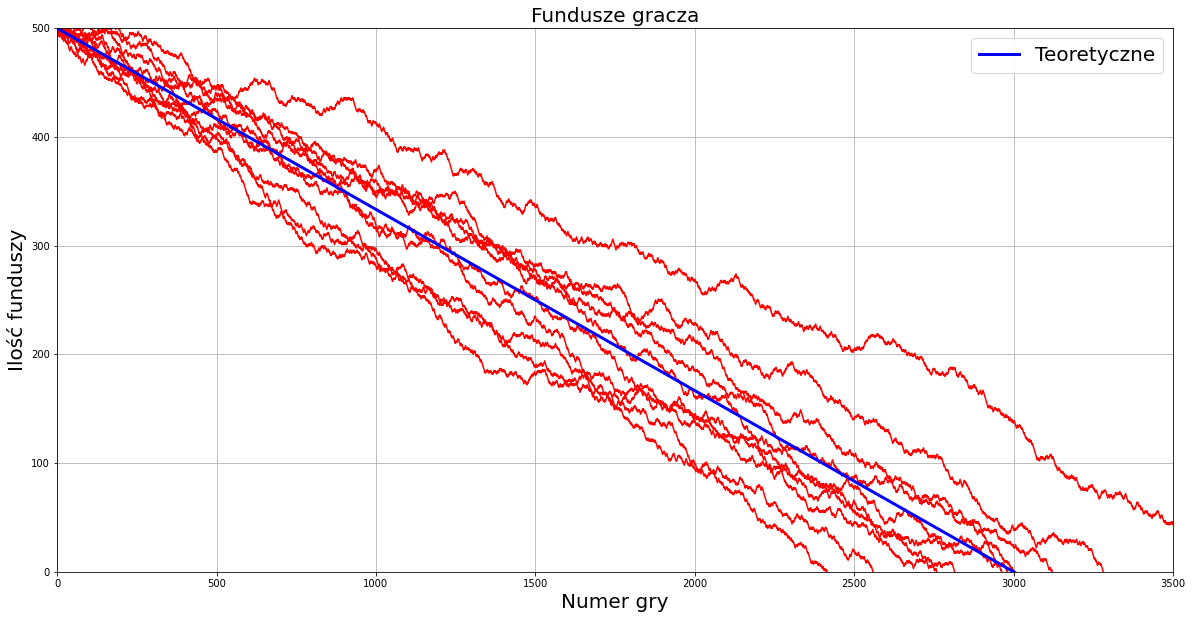

Eksperymentalna wartość wygranej wynosi -0.17113
Teoretyczna wartość wygranej wynosi -0.16667


In [6]:
N = 10**5
starting_amount = 500
bet = 1

simulation_win = []
for i in range(10):
    _, amount_history = dice_game(N, Player(starting_amount), bet, bet)
    plt.plot(np.arange(len(amount_history)), amount_history, color='r')
    simulation_win.append((amount_history[-1] - starting_amount)/len(amount_history))

plt.plot(np.arange(N), [starting_amount + i*(-1/6) for i in np.arange(N)], linewidth=3, color='b', label='Teoretyczne')
plt.title('Fundusze gracza')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Ilość funduszy', fontsize=20)
plt.legend(loc='upper right', prop={'size': 20})
plt.ylim(0, 500)
plt.xlim(0, 3500)
plt.grid()
plt.show()

print(f'Eksperymentalna wartość wygranej wynosi {sum(simulation_win)/len(simulation_win):.5f}')
print(f'Teoretyczna wartość wygranej wynosi {-1/6:.5f}')

### Problem C
* Tak samo jak w problemie B, tylko dla wynagrodzenia $ \dfrac{7}{5} $ [zł], a przegranej $ 1 $ [zł]

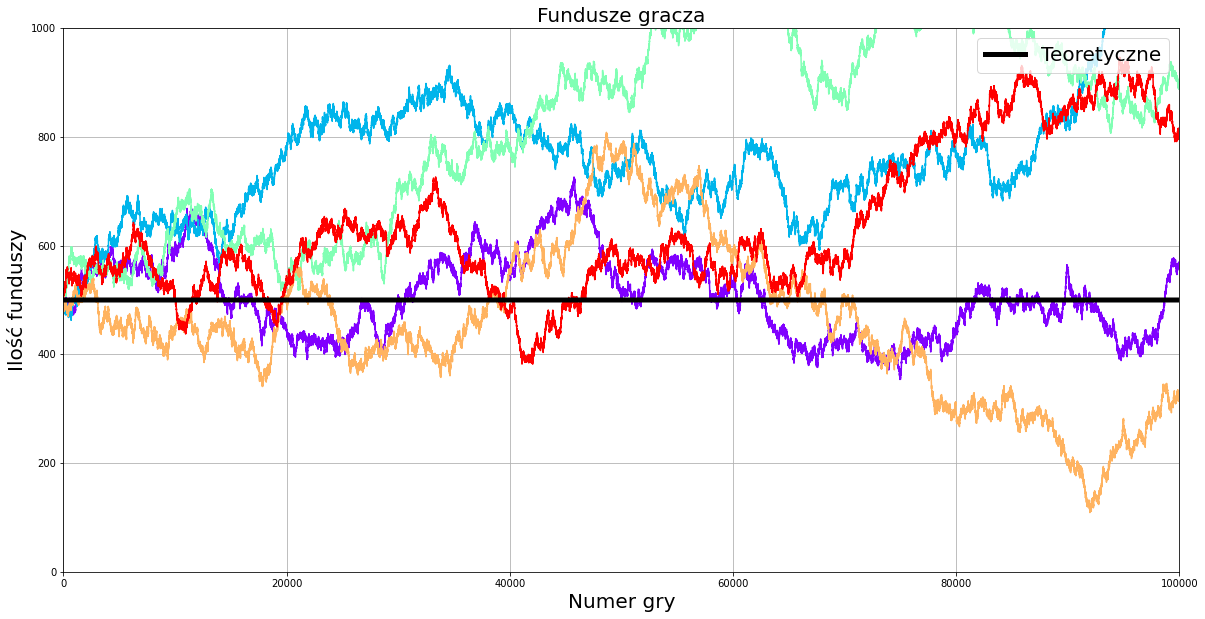

Eksperymentalna wartość wygranej wynosi 0.00237
Teoretyczna wartość wygranej wynosi 0.00000


In [7]:
N = 10**5
starting_amount = 500
bet = 7/5
bet_lost = 1

num_of_simulations = 5
simulation_win = []
colors = cm.rainbow(np.linspace(0, 1, num_of_simulations))

for i in range(num_of_simulations):
    _, amount_history = dice_game(N, Player(starting_amount), bet, bet_lost)
    plt.plot(np.arange(len(amount_history)), amount_history, color=colors[i])
    simulation_win.append((amount_history[-1] - starting_amount)/len(amount_history))

plt.plot(np.arange(N), [starting_amount for i in np.arange(N)], linewidth=5, color='black', label='Teoretyczne')
plt.title('Fundusze gracza')
plt.xlabel('Numer gry', fontsize=20)
plt.ylabel('Ilość funduszy', fontsize=20)
plt.legend(loc='upper right', prop={'size': 20})
plt.ylim(0, 1000)
plt.xlim(0, N)
plt.grid()
plt.show()

print(f'Eksperymentalna wartość wygranej wynosi {sum(simulation_win)/len(simulation_win):.5f}')
print(f'Teoretyczna wartość wygranej wynosi {0:.5f}')

## Polityka kontroli populacji

* Populacja N osób - rodzice
* Parametr $ m("male") $ - udział mężczyzn, $ f("female") $ - udział kobiet. $ f = 1 - m $
* Mamy w populacji $ N_m $ i $ N_f $ - ilości mężczyzn i kobiet
* Maksymalna ilość par: $min(N_m, N_f) $
* Parametr $ p("plodnosc", p \in [0, 1]) $ - udział par, które mogą mieć dzieci
* Ilość par, które mogą mieć dzieci: $ N_p = p * min(N_m, N_f) $

In [8]:
class PolicyControl:
    def __init__(self, number_of_men: int, number_of_women: int, potency: int, lawbreakers: float = 0):
        self.number_of_men = int(number_of_men)
        self.number_of_women = int(number_of_women)
        self.potency = potency
        self.number_of_pairs = None
        self.lawbreakers = lawbreakers
        
    def one_child_policy(self):
        self.number_of_pairs = min(self.number_of_men, self.number_of_women)
        number_of_lawbreaking_pairs = int(self.number_of_pairs * self.lawbreakers)
        new_number_of_women = 0
        new_number_of_men = 0
        for i in range(self.number_of_pairs):
            if i < number_of_lawbreaking_pairs:
                new_number_of_men, new_number_of_women = self.get_6_children(new_number_of_men, new_number_of_women)
            else: 
                child = self.try_get_child()
                if child is not None:
                    if child is 'M':
                        new_number_of_men += 1
                    else:
                        new_number_of_women += 1
        self.number_of_men = new_number_of_men
        self.number_of_women = new_number_of_women
    
    def get_6_children(self, number_of_men: int, number_of_women: int) -> tuple:
        lawbreaking_boys = int(np.random.uniform(0, 7))
        number_of_men += lawbreaking_boys
        number_of_women += 6 - lawbreaking_boys
        return number_of_men, number_of_women
        
    def first_son_policy(self):
        self.number_of_pairs = min(self.number_of_men, self.number_of_women)
        number_of_lawbreaking_pairs = int(self.number_of_pairs * self.lawbreakers)
        new_number_of_women = 0
        new_number_of_men = 0

        for i in range(self.number_of_pairs):
            if i < number_of_lawbreaking_pairs:
                new_number_of_men, new_number_of_women = self.get_6_children(new_number_of_men, new_number_of_women)
            else:    
                while True: 
                    child = self.try_get_child()
                    if child is 'M':
                        new_number_of_men += 1
                        break
                    elif child is None:
                        break
                    else:
                        new_number_of_women += 1
        self.number_of_men = new_number_of_men
        self.number_of_women = new_number_of_women
        
    def try_get_child(self):
        return self.draw_child() if np.random.uniform() < self.potency else None
    
    def draw_child(self):
        return 'M' if np.random.uniform() < 0.5 else 'F'
    
    def __str__(self):
        return f'Generation has {self.number_of_men + self.number_of_women} people'
    
    def __repr__(self):
        return str(self.__dict__)

In [9]:
def simulate_generation_one_child(n: int, policy_control: object) -> list:
    people_history = []
    people_history.append(policy_control.number_of_men + policy_control.number_of_women)
    for i in range(n):
        policy_control.one_child_policy()
        people_history.append(policy_control.number_of_men + policy_control.number_of_women)
    return people_history

In [10]:
def simulate_generation_first_son(n: int, policy_control: object) -> list:
    people_history = []
    people_history.append(policy_control.number_of_men + policy_control.number_of_women)
    for i in range(n):
        policy_control.first_son_policy()
        people_history.append(policy_control.number_of_men + policy_control.number_of_women)
    return people_history

### Problem D
* $ N = 10^6, m = 0.51, f = 0.49, p = 0.92 $
* Zrobić symulację dwóch możliwych polityk kontroli populacji do 10 pokoleń
* Wykres ilości osób w zależności od numeru pokolenia

In [11]:
N = 10**6
m = 0.51
f = 0.49
p = 0.92
generations = 10

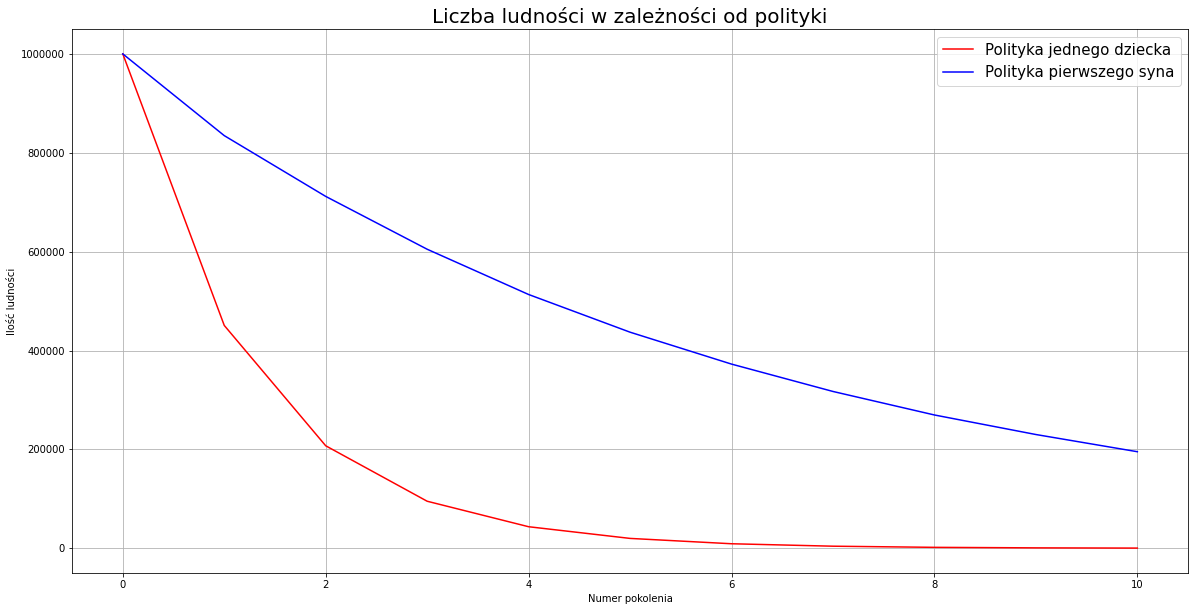

In [12]:
one_child_policy = simulate_generation_one_child(generations, PolicyControl(N * m, N * f, p))
one_son_policy = simulate_generation_first_son(generations, PolicyControl(N * m, N * f, p))
plt.plot(np.arange(0, 11), one_child_policy, color='r', label='Polityka jednego dziecka')
plt.plot(np.arange(0, 11), one_son_policy, color='b', label='Polityka pierwszego syna')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter("%d"))
plt.xlabel('Numer pokolenia')
plt.ylabel('Ilość ludności')
plt.grid()
plt.legend(loc='upper right', prop={'size': 15})
plt.title('Liczba ludności w zależności od polityki')

plt.show()

### Problem E
* $ N = 10^6, m = 0.51, f = 0.49, p = 0.92 $
* Zrobić symulację dwóch możliwych polityk kontroli populacji do 10 pokoleń
* Wykres ilości osób w zależności od numeru pokolenia
* $ 6\% $ par łamie prawo i mają 6 dzieci

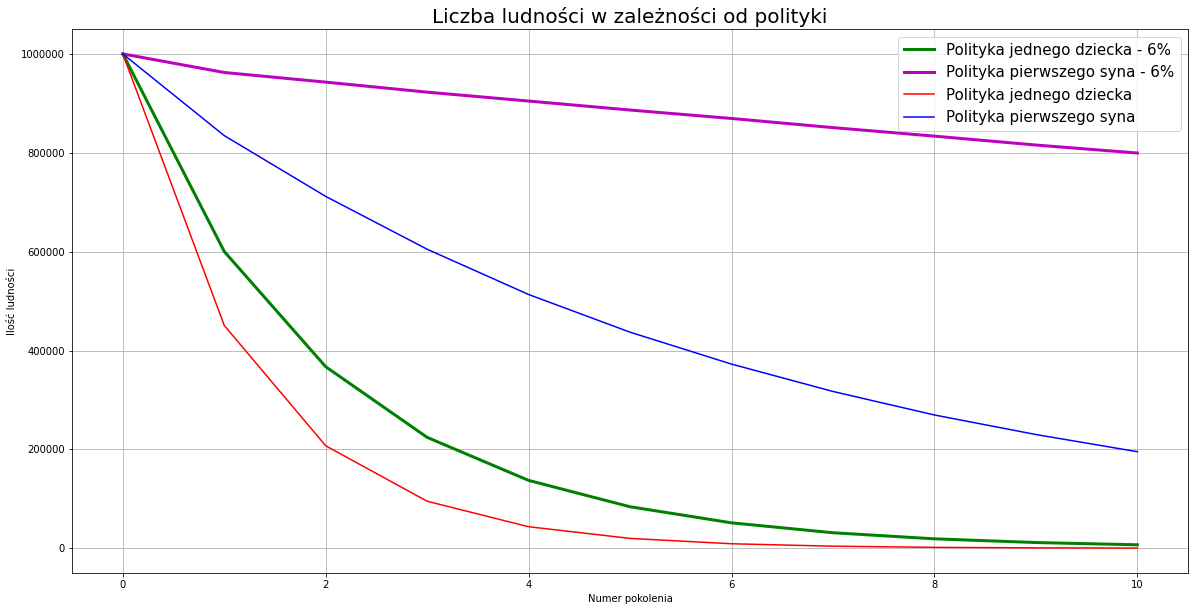

In [13]:
lawbreakers = 0.06

ys = simulate_generation_one_child(generations, PolicyControl(N * m, N * f, p, lawbreakers))
yss = simulate_generation_first_son(generations, PolicyControl(N * m, N * f, p, lawbreakers))

plt.plot(np.arange(0, 11), ys, color='g', linewidth=3, label='Polityka jednego dziecka - 6%')
plt.plot(np.arange(0, 11), yss, color='m',  linewidth=3, label='Polityka pierwszego syna - 6%')
plt.plot(np.arange(0, 11), one_child_policy, color='r', label='Polityka jednego dziecka')
plt.plot(np.arange(0, 11), one_son_policy, color='b', label='Polityka pierwszego syna')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter("%d"))
plt.xlabel('Numer pokolenia')
plt.ylabel('Ilość ludności')
plt.grid()
plt.legend(loc='upper right', prop={'size': 15})
plt.title('Liczba ludności w zależności od polityki')

plt.show()